# Dana Monzer - Group 1 - London Bike-Sharing

# Introduction

Bike-sharing system is an important mode in sustainable transportation modes. Great attention is put to improve such systems to increase their demand and maximize their environmental benefits along with other societal benefits. To study the demand of this system, London Bike-sharing system sis explored. The purpose of this study is to predict ranges of new bike counts each hour based on the certain factors provided in the dataset. As a reference, a case study about San Francisco bike-sharing system by Ashqar et al. (2019) was used for guidance. 
The aim of this report is to conduct exploratory data analysis  using graphical and statistical tools in Python, to derive preliminary conclusions about the dataset by analyzing the results of the tools used. 
The dataset provided was acquired from 3 sources, to include the new bike counts in each hour, the weather conditions, and the holidays. 
The data from cycling dataset is grouped by "Start time", and it represents the count of new bike shares grouped by hour. The long duration shares are not taken in the count.”
The data sample analyzed in this project is collected between 2015-01-01 to 2017-01-01 in London,UK and it includes the following parameters:
-	Timestamp (year, month, day, hour)
-	Cnt:  the count of a new bike shares
-	T1: temperature measure taken in degree Celsius
-	T2: temperature feels 
-	Hum: humidity percentage
-	wind_speed: in Km/hr 	
-	weather_code: 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog
(More details about this categorical variable can be found in this reference https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4677.HTM)

-	is_holiday: 1 if it is a holiday, 0 if it isnot. 
-	is_weekend: 1 if it is a weekend, 0 if it isnot. 	
-	season: 0: Spring, 1: Summer, 2: Fall, 3: Winter
The sections below include the description of methods, code and results, discussion and conclusion. 


# Methods

Five main tools were used to describe the dataset. 

**Scatterplots**

The reason for using scatter plots is to observe relationships between each pair of variables. Each dot in a scatter plot reports the values of individual data point, all the datapoints when plotted can help us identify a pattern that can show whether a relationship can be derived between two variables. This tool will help us decide which pairs of variables to explore further through other tools. Each pair of variables will have two plots. 

**Boxplots**

The reason for using box plots is to provide a visual summary of the data enabling us to visualize the median and range values, the dispersion of the data set, and any signs of skewness. So we can compare dispersion of new bike counts with respect to different values of a parameter. This tool will be used to explore certain relationships further than scatterplots, and not for all pairs of parameters. 
A box plot includes five values: the minimum value, the 25th percentile (Q1), the median, the 75th percentile (Q3), and the maximum value. 

**Multivariate Point Plots** 

The reason multi-variable point plots are used is to shows us the effect of certain variables on the distribution of the new bike counts during the day. So we can obtain different plots depending on the other variable, so we can explore two variables interrelations. And we choose categorical variables to find how their different categories affect the change in new bike counts along a day. 

**Statistical Values**

The reason for finding statistical values is get an insight about the mean, range and maximum and minimum values of different parameters especially new bike counts, and make a connection with the visualizations created. If the dataset included more than 2 years, a good approach would have been to also find covariance between datapoints in different years to identify any change in pattern resulting from certain events associated with a certain year, but this is not needed in our case. 

**Correlation Matrix**

The reason for using correlation matrix is to identify correlation between all parameters in the dataset and the ones affecting new bike counts only. This is important for the predictive model, so we understand and interdependencies between predictors and to avoid multicollinearity. 
Correlation values range between -1 and 1., positive values indicate positive correlation and negative values indicate negative correlation.  Absolute Values above 0.7 generally indicate high positive correlation, between 0.5 and 0.7 is moderate and between 0.3 and 0.5 is low, while under 0.3 is negligible correlation. 



## Code and Results 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
plt.style.use('ggplot')

### Reading train.csv 

In [19]:
##To open on Kaggle: Uncomment the next lines
#import os
#import glob
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
#data = pd.concat([pd.read_csv(f) for f in glob.glob("/kaggle/input/cee-498-project1-london-bike-sharing/train.csv") ])

data = pd.read_csv("train.csv")
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
1,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
2,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
3,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0
4,2015-01-04 10:00:00,528,3.0,-0.5,93.0,12.0,3.0,0.0,1.0,3.0


In [34]:
data.info()
#data.dtypes

#all float except cnt is integer and timestamp is object
#data.shape 
# we have 12222 datapoints 
#We notice the data is clean and doesn't include null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12223 entries, 0 to 12222
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     12223 non-null  datetime64[ns]
 1   cnt           12223 non-null  int64         
 2   t1            12223 non-null  float64       
 3   t2            12223 non-null  float64       
 4   hum           12223 non-null  float64       
 5   wind_speed    12223 non-null  float64       
 6   weather_code  12223 non-null  float64       
 7   is_holiday    12223 non-null  float64       
 8   is_weekend    12223 non-null  float64       
 9   season        12223 non-null  float64       
 10  month         12223 non-null  float64       
 11  day           12223 non-null  float64       
 12  hour          12223 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.2 MB


### Extracting Month, Day and hour from timestamp 

In [35]:
data['timestamp'] = data['timestamp'] .apply(lambda x :datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'))
data['month'] = data['timestamp'].apply(lambda x : float(str(x).split(' ')[0].split('-')[1]))
data['day'] = data['timestamp'].apply(lambda x : float(str(x).split(' ')[0].split('-')[2]))
data['hour'] = data['timestamp'].apply(lambda x : float(str(x).split(' ')[1].split(':')[0]))

data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1.0,4.0,2.0
1,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,1.0,4.0,7.0
2,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,1.0,4.0,8.0
3,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,1.0,4.0,9.0
4,2015-01-04 10:00:00,528,3.0,-0.5,93.0,12.0,3.0,0.0,1.0,3.0,1.0,4.0,10.0


### Scatterplots

We draw scatterplots between all columns except timestamp (we get 12*12 graphs)

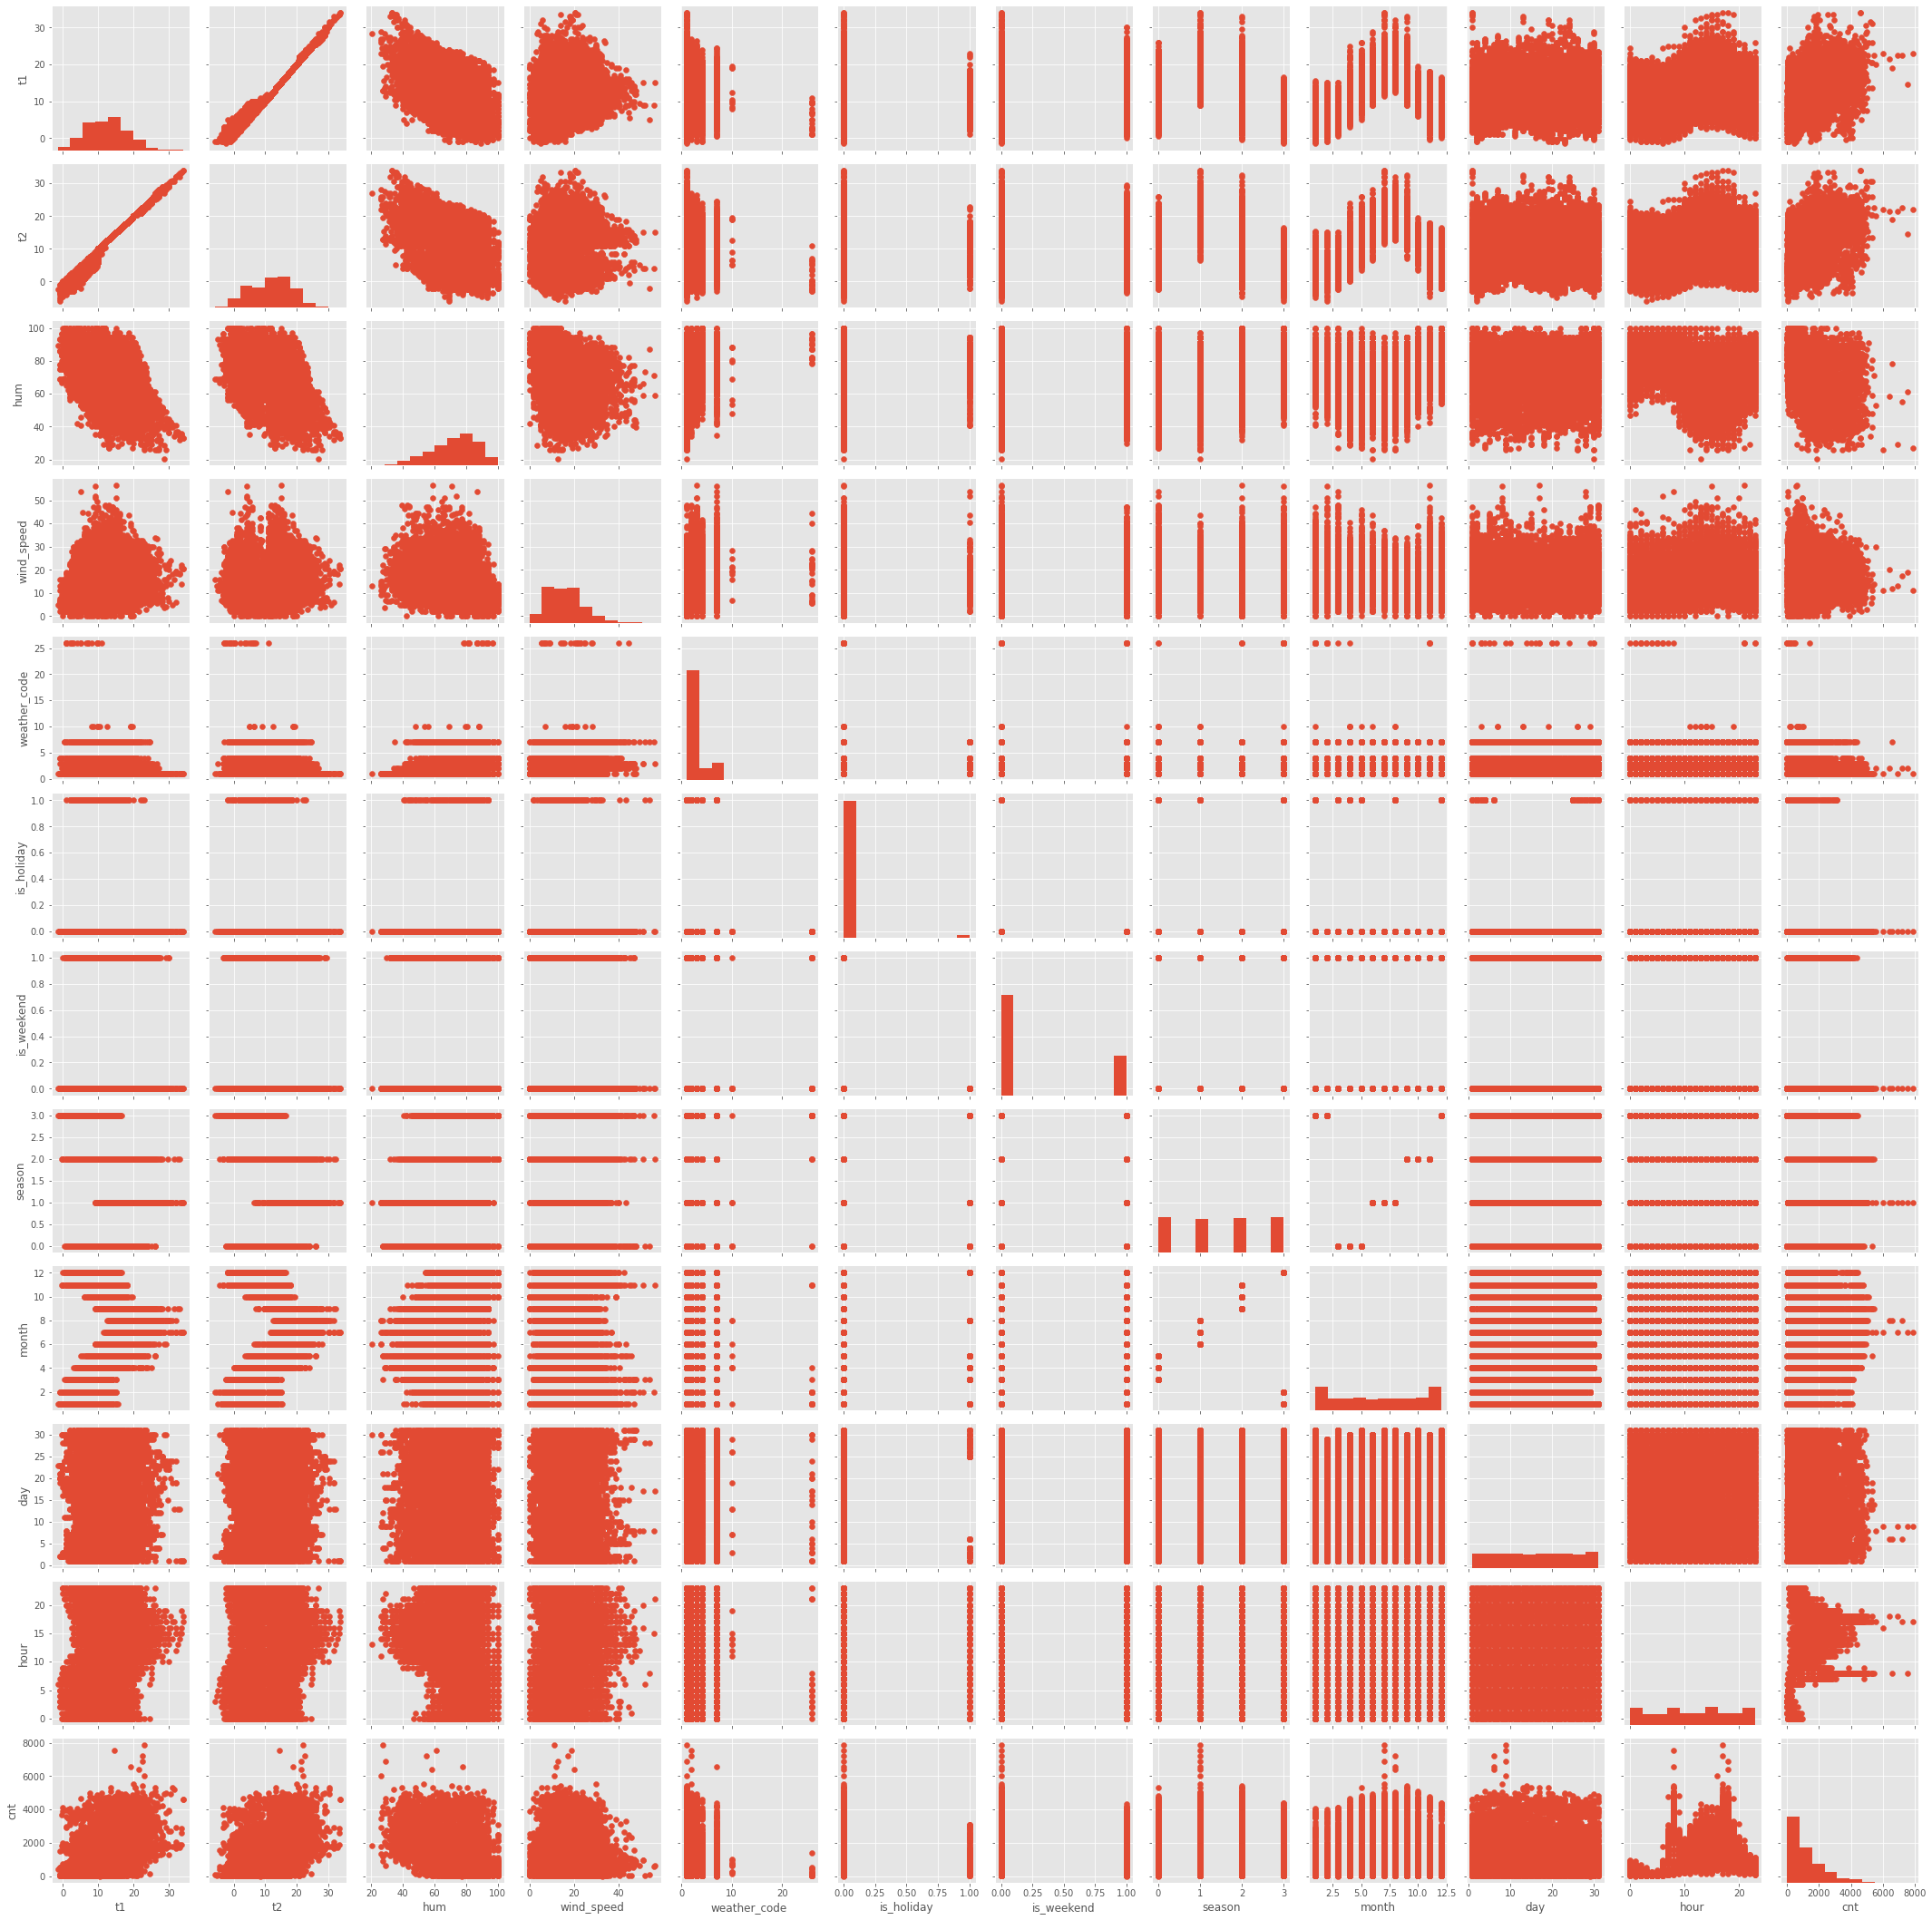

In [62]:
data_sample = data.sample(10000) 

p = sns.PairGrid(data=data_sample, vars=['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend','season','month','day','hour', 'cnt'])
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)

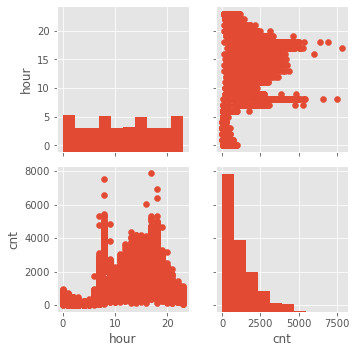

In [37]:
## We plot hour vs cnt alone
data_sample = data.sample(10000) 

p2 = sns.PairGrid(data=data_sample, vars=['hour', 'cnt'])
p2.map_diag(plt.hist)
p2.map_offdiag(plt.scatter)

**Observations** 

By looking at the plots we observe the following:
- 1- t1 and t2 are linearily dependent, which is expected because temperature feel directly depends on temperature.
- 2- Wind_speed and t2 seem to have some kind of relationship, which needs to be explored further
- 3- t1 and t2 have some kind of relationship with humidity, which needs to be explored further.
- 4- t1, t2, humidity and wind speed have some kind of relationship with cnt, which needs to be - explored further.
- 5 - Weather code and cnt have some kind of relationship.
- 6- Cnt seems higher when is_holiday is 0 (so when it is not a holiday)
- 7- Cnt seems higher when is_weekend is 0 (so during weekdays)
- 8- Cnt seems higher for weather codes (0-9)
- 9- Cnt seems higher for season 1 (summer), then similar for seasons 0 and 2 and lowest for season 3 (winter). 
- 10- Cnt seems highest for month 7,9,8,5 (expected based on observation 9)
- 11- It doesn't seem a certain pattern can be derived for effect of day on cnt. 
- 12- Cnt seems to have a relation depending on hour that can be explored further and it seems to be a multi-peak distribution

The observations above allow us to build hypthesis that can be explored further using other EDA tools which will lay down the basis of our predictive model.

## Boxplots 

We explore relationship between cnt and month and hour further using boxplots


<AxesSubplot:xlabel='hour', ylabel='cnt'>

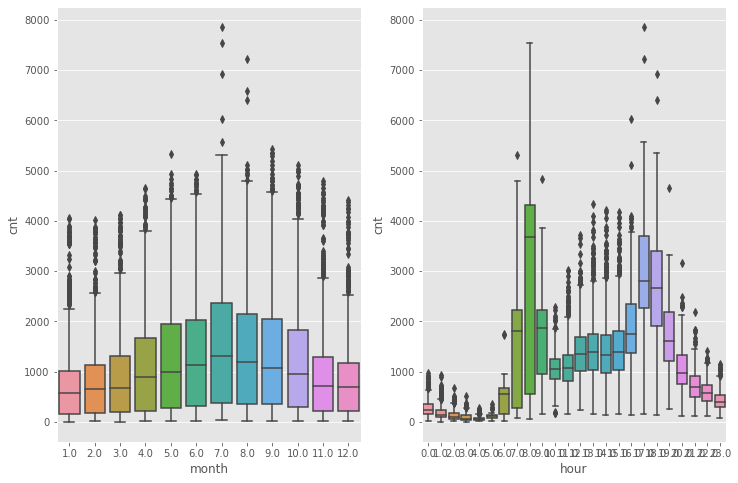

In [38]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12, 8)

sns.boxplot(data=data, x='month', y='cnt', ax=ax1)
sns.boxplot(data=data, x='hour', y='cnt', ax=ax2)


**Interpretation**

- Graph1 shows that: 
>  - 1- There seems to be a distribution of the median (middle line of the boxplot) and range (of the black line of each boxplot) of cnt with respect to month, it roughly follows a normal ditribution, peaking in July. 
>  - 2- For each month the distributions tends to be skewed to the right.
>  - 3- Months with lowest ranges are January, February, November and December. 
- Graph2 shows that:
>  - 1- There is no clear distribution of median of cnt over the hours of the day, but the variation shows that cnt varies between different hours in the day, which seems to have two peaks, around 8 am then around 5 pm. 
>  - 2- During some hours, the shape of the distribution of cnt tends to be normal, while it's more skewed to the right for some other hours. 
>  - 3- As expected night hours have the lowest cnt. 

## Multivariate Point Plots 

<AxesSubplot:xlabel='hour', ylabel='cnt'>

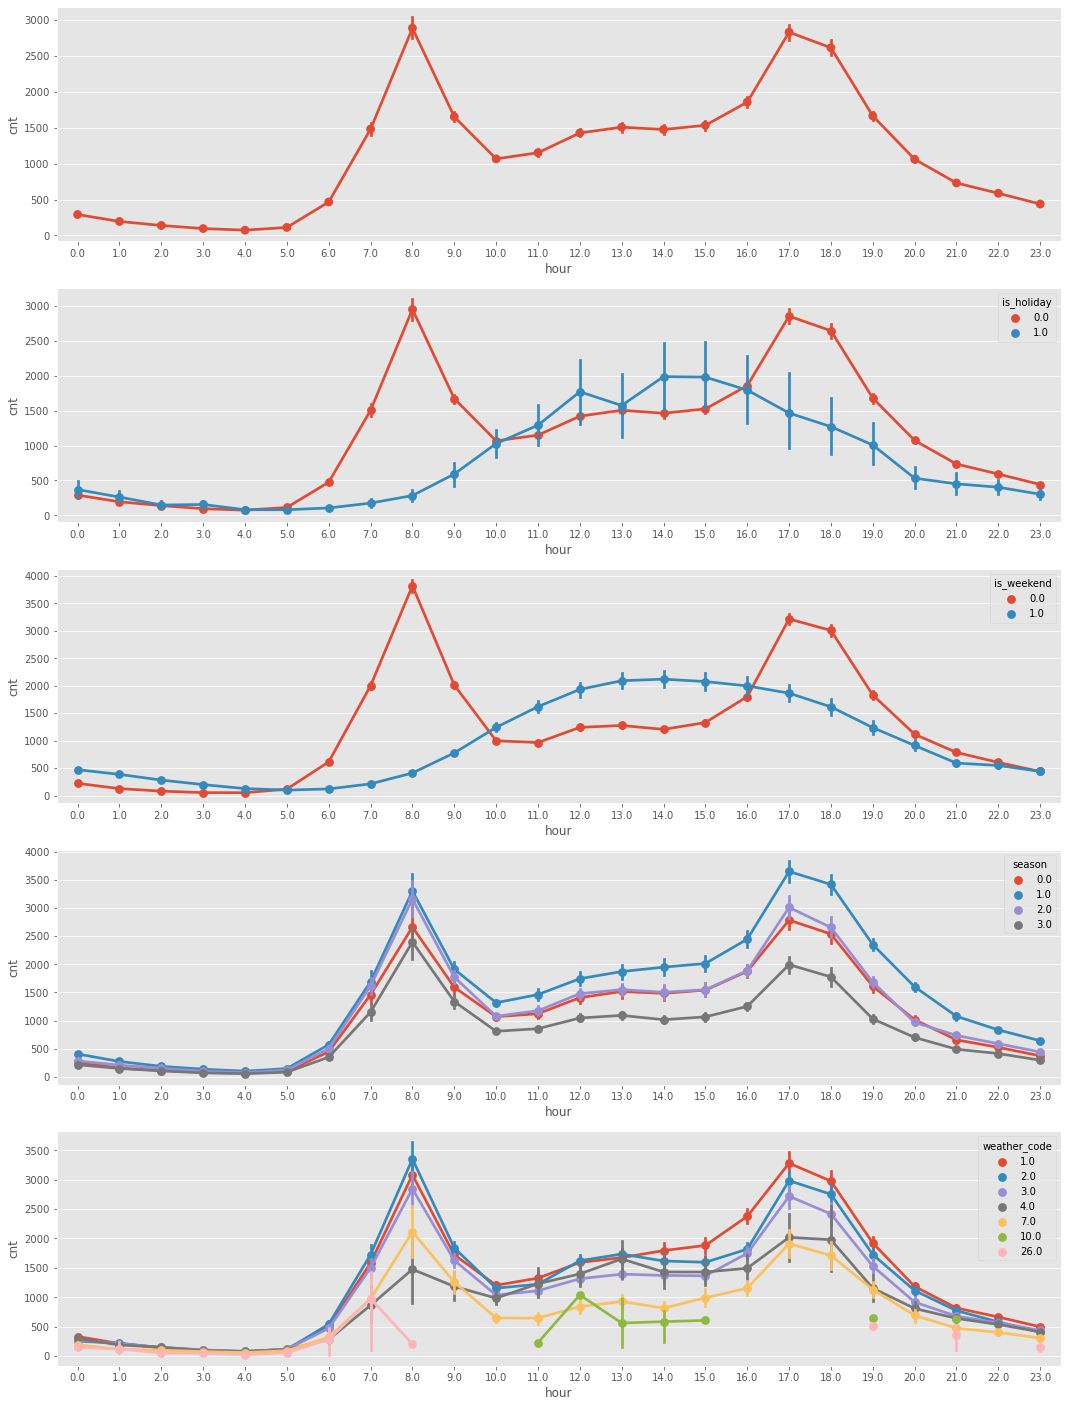

In [39]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=data, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=data, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=data, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=data, x='hour', y='cnt', hue='season', ax=ax4)
sns.pointplot(data=data, x='hour', y='cnt', hue='weather_code',ax=ax5)

**Interpretation**

- Graph1 shows the general plot of new bike counts over the hours of the day. 
- Graph2 provides interesting insight as it shows that the distribution of the counts during the day is different on a holiday is at peaks around 1 pm - 2pm, while during regular days, it has two peaks around 8 am and 5 pm, which follows the governing distribution and was shown in the boxplots as well. 
- Graph 3 shows similar results for weekends as holidays and for weekdays as non-holiday days
- Graph 4 shows that the seasons order based on highest bike counts is summer, then fall and spring, and then winter, which validates more clearly previous results. 
- Graph 5 shows high effect of weather in general, which is significant for codes 10 and 26 (10 = rain with thunderstorm, 26 = snowfall), implying no counts occur in such extreme cold weathers. 


## Statistical Values 

In [60]:
df2 = data.describe()
df2


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
count,12223.000000,12223.000000,12223.000000,12223.000000,12223.000000,12223.000000,12223.000000,12223.000000,12223.000000,12223.000000,12223.000000,12223.000000
mean,1138.098830,12.481742,11.543715,72.407081,15.923757,2.730426,0.020944,0.282091,1.498405,6.526139,15.739344,11.464289
std,1079.326816,5.546247,6.588240,14.262836,7.925239,2.295948,0.143203,0.450036,1.120819,3.462204,8.802342,6.903442
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,255.500000,8.500000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,8.000000,6.000000
50%,841.000000,12.500000,12.500000,75.000000,15.000000,2.000000,0.000000,0.000000,2.000000,7.000000,16.000000,11.000000
75%,1670.500000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,3.000000,10.000000,23.000000,17.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,12.000000,31.000000,23.000000


**Outcomes**
>This gives us general insight about the mean and range of each parameter but it's irrelevant for time parameters. The main outcomes is that the values of cnt in each hour over the two years of study, have a mean of 1138 and standard deviation of 1079, which is almost equivalent to the mean which means that there is significant difference between cnt values in certain hours than others. And this was indeed shown in the visualizations. We also notice that the maximum value is 7860, almost 7 times as big as the mean, which also means that there are very relatively few hours with such high values that they didn't affect the mean significantly. However this might be also affected by the fact that we the datapoints include records along the day including night time, were people are not using bikes or commuting at all. We notice the temperature values range between -1.5 and 34 degrees C, which might not be representative of others cities; same applies to teh humidity and wind speed. So it's important to highlight this factor when representing the predictive model at later stage. 

## Correlations 

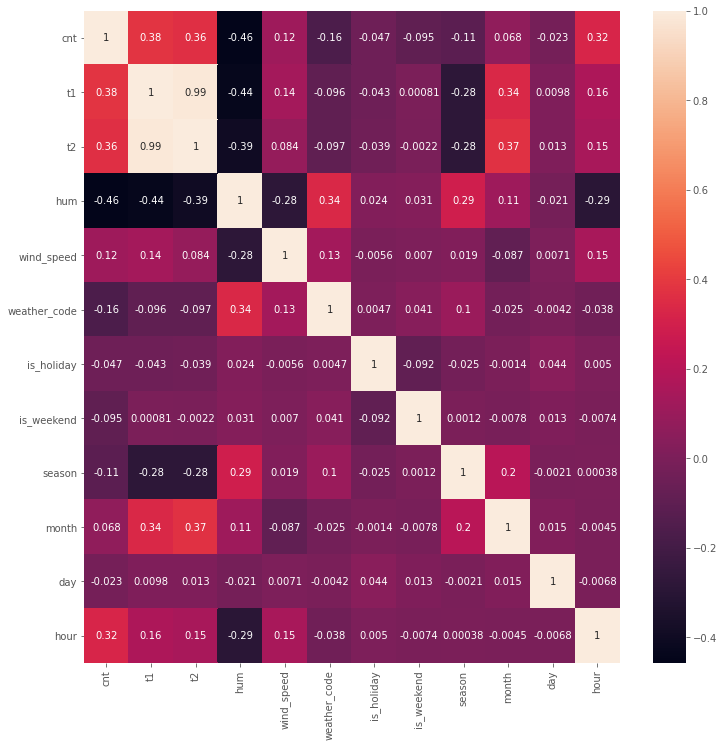

In [41]:
corrmat = data.corr()
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(corrmat, vmax=1, annot=True);

**Interpretation**

We can follow the color map to find the variables of some correlation, which are the variables with correlation above roughly above 0.3, which are colored by red or lighter shade of color or less than -0.3, which are colored in black . As expected t1 and t2 have high correlation which means only variable might be included in the predictive model at most. 

  - cnt shows correlation to t1 & t2 & humidity and hour of the day. 
  - t1 and t2 show correlation to cnt, humidity, and month of the year. 
  - humidity shows correlation to cnt, t1 & t2, and weather code
  - wind speed shows correlation to slightly to humidity 
  - weather code shows correlation to humidity 
  - holidays binary doesn't show correlation to any other parameter
  - weekend binary doesn't show correlation to any other parameter
  - season shows correlation to t1 & t2, humidity
  - month shows correlation to t1 & t2
  - day of the month doesn't show correlation to any other parameter
  - hour shows correlation to cnt and humidity



# Discussion

To summarize the results and analysis.

The scatterplots showed that t1 and t2 are directly related, and possible relationship between wind speed and t2, t1 and humidity, humidity and bike counts, bike counts and wind speed, bike counts and temperature, weather code and bike counts. It also shows that bike counts are higher during weekdays and non-holidays and for better weather conditions. Also, it shows that highest counts occur for summer. And no pattern was shown between counts and day of month.

The boxplots showed that there seems to be a distribution of counts based on month, and that the counts are mostly skewed to the right. Also, that the distribution of counts over the hours of the day have two peaks, and within the hour the distribution is mostly normal but for some hours it is skewed to the right.  
 
Multivariate point plots show interesting insights about the change of the variation of counts over the day from bi-modal, for regular days and weekdays, to unimodal for holidays and weekends. And it also showed that although summer has highest counts and winter has the lowest, fall and spring seem to have similar values. 

And the correlations showed that new counts are mainly correlated to temperature, humidity and hour of the day with no significance correlation to other parameters. And some of the other parameters are correlated as well especially weather attributes (humidity, temperature, wind speed..).


# Conclusion

We can derive several conclusions from the results of the exploratory data analysis. We explored which factors have a direct relationship with the new bike counts registered each hour, and the results show that the main factors affecting the range of new bike counts in an hour are temperature, humidity, and hour of the day, with some effect shown in visualizations by the weekdays, weather description, month and season. 

Improvements on this report can be made to use other tools, however the tools used gave enough insight to prepare for the generating the predictive model in the next stage, in collaboration with other group members. 
